In [46]:
import torch
import numpy as np 
from torch.autograd import Variable
import torch.nn.functional as fun
import matplotlib.pyplot as plt

In [47]:
#神经网络快速搭建
net=torch.nn.Sequential(
    torch.nn.Linear(1,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1)
)
print(net)

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)


In [56]:
#fake data
x=torch.unsqueeze(torch.linspace(-1,1,100),dim=1) #把一维随机数据变为二维，因为它只处理二维
y=x.pow(2)+0.2*torch.rand(x.size())

In [57]:
#转化
x,y=Variable(x),Variable(y)

In [59]:
#优化策略与损失函数
optimizer=torch.optim.SGD(net.parameters(),lr=0.5)
loss_func=torch.nn.MSELoss()

In [69]:
def save():
    #训练
    for i in range(100):
        predict=net(x)
        loss=loss_func(predict,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #保存整个神经网络
    torch.save(net,'net.pkl')
    #只保留节点参数
    torch.save(net.state_dict(),'net_params.pkl')
    #net1
    plt.subplot(131)
    plt.title('net1')
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),predict.data.numpy(),'r-',lw=5)

In [70]:
#提取存好的整个网络
def restore_net():
    net2=torch.load('net.pkl')
    predict2=net2(x)
    #net2
    plt.subplot(132)
    plt.title('net2')
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),predict2.data.numpy(),'r-',lw=5)


In [71]:
#提取参数
def restore_params():
    net3=torch.nn.Sequential(
        torch.nn.Linear(1,10),
        torch.nn.ReLU(),
        torch.nn.Linear(10,1)
    )
    net3.load_state_dict(torch.load('net_params.pkl'))
    predict3=net3(x)
    #net3
    plt.subplot(133)
    plt.title('net3')
    plt.scatter(x.data.numpy(),y.data.numpy())
    plt.plot(x.data.numpy(),predict3.data.numpy(),'r-',lw=5)

In [72]:
plt.figure(1,figsize=(10,3))

<Figure size 720x216 with 0 Axes>

<Figure size 720x216 with 0 Axes>

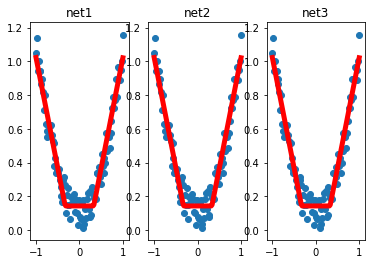

In [73]:
#查看三个网络效果（已存在当前目录）
save()
restore_net()
restore_params()